In [11]:
import numpy as np
import torch
from torch.utils.data import DataLoader
import sys
sys.path.append("../")
from lib import *
from loss import NceLoss
from dataset import cNCENoisyMnist
import matplotlib.pyplot as plt
import scipy

In [12]:
def show_image(image):
    plt.figure(figsize=(4,4))
    plt.axis("off");
    plt.imshow(image, cmap="gray");


def show_matrix(mat):
    plt.figure(figsize=(8,8));
    plt.matshow(mat, fignum=1, cmap="gray");
    plt.show();

In [13]:
img_file = "../data/train-images-idx3-ubyte"
x_train = parsing_file(img_file)

In [14]:
xs_train, mnist_mean = pre_process(x_train)

In [15]:
mnist_mean

0.1306604762738429

# Loading Optimization variables

In [16]:
lambda_ = np.load("../cNCE_results/precision_matrix.npy")

In [17]:
eig_vals, eig_vecs = np.linalg.eig(lambda_)
eig_vals[eig_vals < 0] = 1.0
L = np.linalg.cholesky(eig_vecs @ np.diag(eig_vals) @ eig_vecs.T)

In [21]:
res = mnist_mean + scipy.linalg.solve_triangular(L, np.random.normal(size=28**2), lower=True)
res = res.reshape(28, 28)

In [22]:
res[res<0]=0
res[res>1]=1

# Results

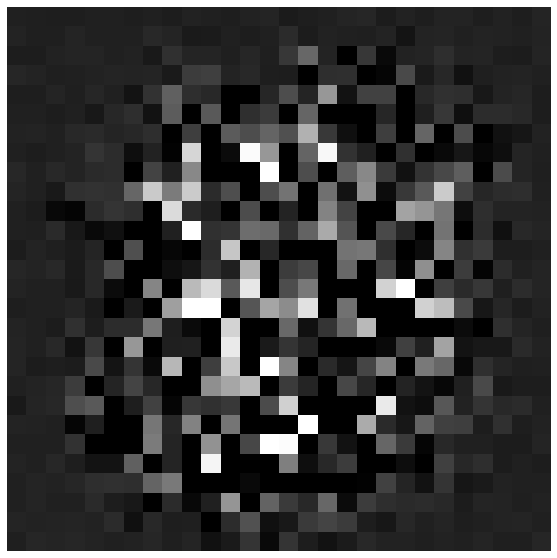

In [23]:
plt.figure(figsize=(10,10))
plt.imshow(res, cmap="gray");
plt.axis("off");